In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('..')

## Behaviour evaluation plots

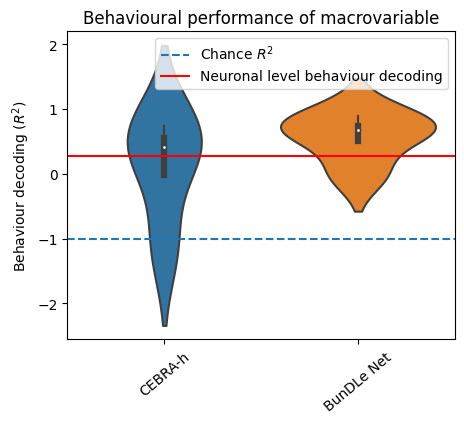

In [2]:
### POOLING RATS
algorithms = ['cebra_h',  'BunDLeNet']
r2_array = []
for alg in algorithms:
    rat_i_r2 = []
    rat_chance_r2 = []
    rat_X_r2 = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        r2 = np.loadtxt('data/generated/evaluation_metrics/r2_list_' + alg + '_rat_' +   rat_name)
        X_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_X_rat_'+ rat_name).max()
        chance_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_chance_rat_'+ rat_name).mean()
        rat_i_r2.append(r2.mean())
        rat_chance_r2.append(chance_r2)
        rat_X_r2.append(X_r2)
        
    r2_array.append(rat_i_r2)

r2_array = np.array(r2_array)
rat_chance_r2 = np.array(rat_chance_r2)
rat_X_r2 = np.array(rat_X_r2)


plt.figure(figsize=(5,4))
ax = sns.violinplot(data=r2_array.T[:,:7])
ax.set_xticklabels(['CEBRA-h', 'BunDLe Net'], rotation=40)
ax.set(ylabel = "Behaviour decoding ($R^2$)", title ='Behavioural performance of macrovariable')
ax.axhline(rat_chance_r2.mean(), linestyle='--',label='Chance $R^2$') ### Chance accuracy (see Evaluation .ipynb)
ax.axhline(rat_X_r2.mean(), linestyle='-',label='Neuronal level behaviour decoding', color='red') ### Chance accuracy (see Evaluation .ipynb)

ax.legend()

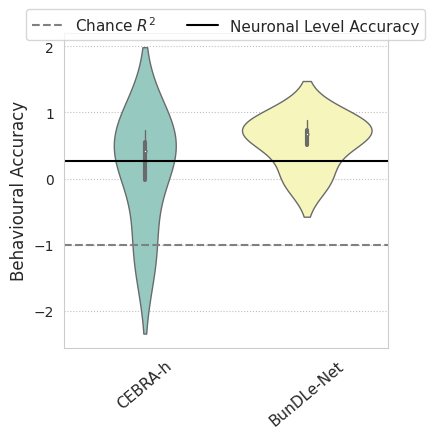

In [3]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 5))
ax = sns.violinplot(data=r2_array.T, linewidth=1, palette=color_palette)
ax.set_xticklabels([ 'CEBRA-h', 'BunDLe-Net'], rotation=40, fontsize=11)
ax.set_ylabel("Behavioural Accuracy", fontsize=12)
ax.axhline(rat_chance_r2.mean(), linestyle='--', label='Chance $R^2$', color='gray')
ax.axhline(rat_X_r2.mean(), linestyle='-', label='Neuronal Level Accuracy', color='black')
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#plt.savefig('Figures/behavioural_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [4]:
''' # Evaluations for each rat individually
for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
    acc_array = []
    algorithms = ['cebra_h', 'BunDLeNet']
    for alg in algorithms:
        acc_array.append( np.loadtxt('data/generated/evaluation_metrics/acc_list_' + alg + '_rat_' +  str(rat_name)) )
    acc_array = np.array(acc_array)
    ### Neuronal level accuracy (X)
    X_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_X_rat_'+str(rat_name)).max()
    chance_r2 = np.loadtxt('data/generated/evaluation_metrics/acc_list_chance_rat_'+str(rat_name)).mean()



    plt.figure(figsize=(5,4))
    ax = sns.violinplot(data=acc_array.T[:,:7])
    ax.set_xticklabels(['CEBRA-h', 'BunDLe Net'], rotation=40)
    ax.set(ylabel = "Decoding accuracy", title ='Behavioural performance of macrovariable')
    ax.axhline(chance_r2, linestyle='--',label='Chance accuracy') ### Chance accuracy (see Evaluation .ipynb)
    ax.axhline(X_r2, linestyle='-',label='Neuronal level accuracy', color='red') ### Chance accuracy (see Evaluation .ipynb)

    ax.legend()
    plt.savefig('behavioural_performance.pdf', transparent=True)
'''

' # Evaluations for each rat individually\nfor rat_name in [\'achilles\', \'gatsby\',\'cicero\', \'buddy\']:\n    acc_array = []\n    algorithms = [\'cebra_h\', \'BunDLeNet\']\n    for alg in algorithms:\n        acc_array.append( np.loadtxt(\'data/generated/evaluation_metrics/acc_list_\' + alg + \'_rat_\' +  str(rat_name)) )\n    acc_array = np.array(acc_array)\n    ### Neuronal level accuracy (X)\n    X_r2 = np.loadtxt(\'data/generated/evaluation_metrics/acc_list_X_rat_\'+str(rat_name)).max()\n    chance_r2 = np.loadtxt(\'data/generated/evaluation_metrics/acc_list_chance_rat_\'+str(rat_name)).mean()\n\n\n\n    plt.figure(figsize=(5,4))\n    ax = sns.violinplot(data=acc_array.T[:,:7])\n    ax.set_xticklabels([\'CEBRA-h\', \'BunDLe Net\'], rotation=40)\n    ax.set(ylabel = "Decoding accuracy", title =\'Behavioural performance of macrovariable\')\n    ax.axhline(chance_r2, linestyle=\'--\',label=\'Chance accuracy\') ### Chance accuracy (see Evaluation .ipynb)\n    ax.axhline(X_r2, lines

## Dynamics evaluation plots

cebra_h achilles [0.0076464  0.00799055 0.0069449  0.0080229  0.00773948 0.00801396
 0.00800039 0.00756186 0.00787346 0.00782579]
cebra_h gatsby [0.02260432 0.02372419 0.02373882 0.02272772 0.02313717 0.02261986
 0.02274426 0.01978585 0.02402525 0.02374608]
cebra_h cicero [0.03660145 0.03372334 0.03584148 0.03707106 0.0358945  0.03661671
 0.03459837 0.03558761 0.03482081 0.03691797]
cebra_h buddy [0.02899913 0.02948493 0.02934365 0.02845953 0.0298304  0.02932133
 0.02974038 0.02929629 0.02970835 0.02928835]
BunDLeNet achilles [0.03852584 0.03986164 0.03889208 0.03846741 0.03974898 0.03963698
 0.03946865 0.03973393 0.0391299  0.03935919]
BunDLeNet gatsby [0.00788183 0.00889065 0.00847624 0.00741684 0.00689462 0.00768927
 0.00728223 0.00623311 0.00773183 0.00670238]
BunDLeNet cicero [0.00917761 0.01194982 0.01101923 0.01524943 0.00884255 0.01084609
 0.00925599 0.01074451 0.01388584 0.01291926]
BunDLeNet buddy [0.01659883 0.0162656  0.01621321 0.01648395 0.01639332 0.01643318
 0.01638576 

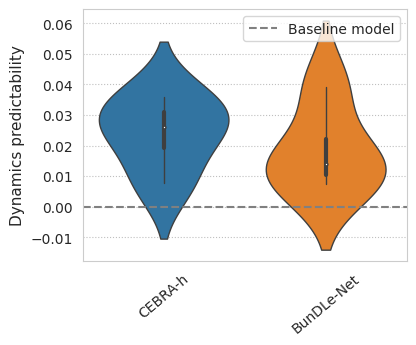

In [7]:
### POOLING ratS
'''
algorithms = ['cebra_h', 'BunDLeNet']
acc_array = []
for alg in algorithms:
    rat_i_r2 = []
    '''
algorithms = ['cebra_h', 'BunDLeNet']
dp_array = []
for alg in algorithms:
    rat_i_dp = []
    for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
        mse = np.loadtxt('data/generated/evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name))
        dyn_pred = 1 -  mse[:,3]/mse[:,2]
        rat_i_dp.append(dyn_pred.mean())
        print(alg, rat_name, dyn_pred)

    dp_array.append(rat_i_dp)
    
dp_array = np.array(dp_array)


plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=dp_array.T, linewidth=1)
ax.set_xticklabels(['CEBRA-h', 'BunDLe-Net'], rotation=40, fontsize=10)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# Adjust the bottom margin
plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
ax.legend()

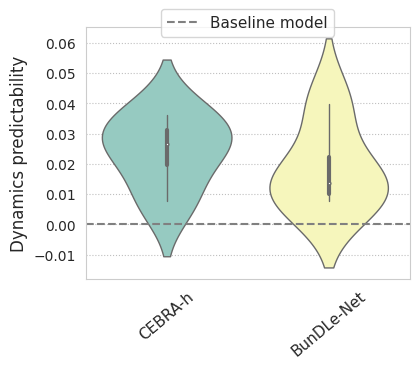

In [20]:
sns.set_style("whitegrid")
color_palette = sns.color_palette("Set3")
plt.figure(figsize=(4.5, 4))
ax = sns.violinplot(data=dp_array.T[:6], linewidth=1, palette=color_palette)
ax.set_xticklabels(['CEBRA-h', 'BunDLe-Net'], rotation=40, fontsize=11)
ax.yaxis.set_label_text("Dynamics predictability", fontsize=12)

ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
ax.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
plt.subplots_adjust(bottom=0.25, left=0.18)
ax.legend(fontsize=11, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
#plt.savefig('Figures/dynamical_performance.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [7]:
''' # Evaluations for each rat individually
for rat_name in ['achilles', 'gatsby','cicero', 'buddy']:
    mse_array = []
    algorithms = ['cebra_h', 'BunDLeNet']
    for alg in algorithms:
        filename = 'data/generated/evaluation_metrics/mse_list_' + alg + '_rat_' +  str(rat_name)
        mse_array.append(np.loadtxt(filename))
    mse_array = np.array(mse_array)
    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]


    plt.figure(figsize=(4.5, 4))
    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)
    ax.set_xticklabels([ 'CEBRA-h' 'BunDLe-Net'], rotation=40, fontsize=10)
    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)
    ax.axhline(0.0, linestyle='--',label='Baseline model', color='gray') ### Baseline goodness of fit (by definition)
    plt.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
    # Adjust the bottom margin
    plt.subplots_adjust(bottom=0.25, left=0.18)  # You can modify this value as needed
    ax.legend()
'''

' # Evaluations for each rat individually\nfor rat_name in ['achilles', 'gatsby','cicero', 'buddy']:\n    mse_array = []\n    algorithms = [\'PCA\', \'tsne\', \'cebra_h\', \'autoencoder\', \'ArAe\', \'BunDLeNet\']\n    for alg in algorithms:\n        filename = \'data/generated/evaluation_metrics/mse_list_\' + alg + \'_rat_\' +  str(rat_name)\n        mse_array.append(np.loadtxt(filename))\n    mse_array = np.array(mse_array)\n    goodness_of_fit = 1 -  mse_array[:,:,3]/mse_array[:,:,2]\n\n\n    plt.figure(figsize=(4.5, 4))\n    ax = sns.violinplot(data=goodness_of_fit.T, linewidth=.5)\n    ax.set_xticklabels([\'PCA\', \'t-SNE\', \'CEBRA-h\', \'autoencoder\', \'ArAe\', \'BunDLe-Net\'], rotation=40, fontsize=10)\n    ax.yaxis.set_label_text("Dynamics predictability", fontsize=11)\n    ax.axhline(0.0, linestyle=\'--\',label=\'Baseline model\', color=\'gray\') ### Baseline goodness of fit (by definition)\n    plt.grid(axis=\'y\', linestyle=\':\', color=\'gray\', alpha=0.5)\n    # Adjust t